In [1]:
import fastbook as fb
fb.setup_book()
import fastai.vision.all as fva
fva.matplotlib.rc('image', cmap='Greys')

/home/mark/miniconda3/envs/py10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = fb.untar_data(fb.URLs.MNIST_SAMPLE)
fb.Path.BASE_PATH = path

In [3]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [4]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [77]:
(path/'train/3').ls()

(#6131) [Path('train/3/11201.png'),Path('train/3/43902.png'),Path('train/3/41337.png'),Path('train/3/14401.png'),Path('train/3/43327.png'),Path('train/3/50837.png'),Path('train/3/53923.png'),Path('train/3/38218.png'),Path('train/3/34023.png'),Path('train/3/31032.png')...]

In [89]:
for it in (path / 'train/3').iterdir():
    if not 'png' in it.absolute().as_posix():
        print(it)

In [5]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [6]:
im3_path = threes[1]
im3 = fva.Image.open(im3_path)
im3

In [7]:
fva.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [8]:
fva.tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
im3_t = fva.tensor(im3)
df = fva.pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [10]:
seven_tensors = [fva.tensor(fva.Image.open(o)) for o in sevens]
three_tensors = [fva.tensor(fva.Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)
# new_list = [f(o) for o in a_list if o>0]

(6265, 6131)

<Axes: >

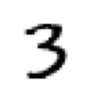

In [11]:
fva.show_image(three_tensors[1])

In [12]:
three_tensors[1].shape, three_tensors[1].ndim, len(three_tensors[1].shape)

(torch.Size([28, 28]), 2, 2)

In [13]:
stacked_sevens = fva.torch.stack(seven_tensors).float()/255
stacked_threes = fva.torch.stack(three_tensors).float()/255
stacked_threes.shape
# shape is size of each axis of a tensor

torch.Size([6131, 28, 28])

In [14]:
len(stacked_threes.shape), stacked_threes.ndim
# rank is the number of axis

(3, 3)

In [15]:
mean3 = stacked_threes.mean(0)
mean3.shape, mean3.ndim

(torch.Size([28, 28]), 2)

<Axes: >

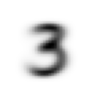

In [16]:
fva.show_image(mean3)

In [17]:
mean3x = stacked_threes.mean(1)
mean3x.shape, mean3x.ndim

(torch.Size([6131, 28]), 2)

In [18]:
mean3y = stacked_threes.mean(2)
mean3y.shape, mean3y.ndim

(torch.Size([6131, 28]), 2)

<Axes: >

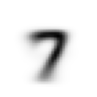

In [19]:
mean7 = stacked_sevens.mean(0)
fva.show_image(mean7)

<Axes: >

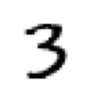

In [20]:
a_3 = stacked_threes[1]
fva.show_image(a_3)

In [21]:
var3 = (a_3 - mean3).abs().mean((-1, -2)) # mean of last 2 axes of a tensor
var3

tensor(0.1114)

In [22]:
valid_3_tens = \
fva.torch.stack(
    [fva.tensor(fva.Image.open(o)) for o in (path/'valid/3').ls().sorted()]
)
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = \
fva.torch.stack(
    [fva.tensor(fva.Image.open(o)) for o in (path/'valid/7').ls().sorted()]
)
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
def mnist_distance(a, b): return(a-b).abs().mean((-1, -2))
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [24]:
def is_3(x): return mnist_distance(x, mean3) < \
    mnist_distance(x, mean7)
is_3(a_3)

tensor(True)

In [25]:
is_3(valid_3_tens).float().mean()

tensor(0.9168)

In [26]:
1 - is_3(valid_7_tens).float().mean()

tensor(0.9854)

In [27]:
??fb.to_np

Signature: fb.to_np(x)
Source:   
def to_np(x):
    "Convert a tensor to a numpy array."
    return apply(lambda o: o.data.cpu().numpy(), x)
File:      ~/miniconda3/envs/py10/lib/python3.10/site-packages/fastai/torch_core.py
Type:      function

In [28]:
time = fva.torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

tensor([58.0404, 46.5809, 36.1011, 23.1917, 18.0128, 14.7675,  9.5512,  7.2709,  2.8838,  0.1201,  0.4100,  2.7122,  4.4026,  8.4126, 12.7726, 20.4398, 25.8854, 34.1564, 45.5551, 54.2176])


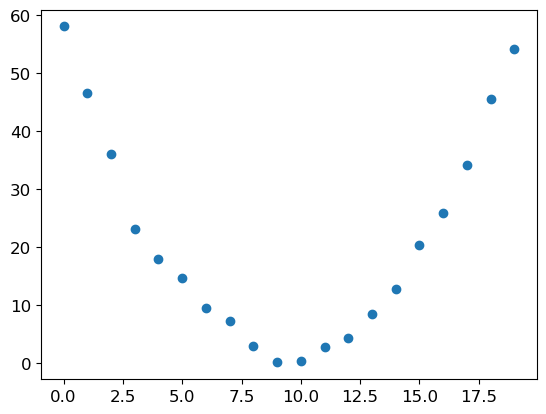

In [29]:
speed = fva.torch.randn(20)*1.5 + 0.6*(time-9.5)**2 +1
print(speed)
fva.plt.scatter(time, speed)

In [30]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [31]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [32]:
params = fva.torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [33]:
orig_params = params.clone().detach()

In [34]:
preds = f(time, params)

In [35]:
def show_preds(preds, ax=None):
    if ax is None: ax = fva.plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, fva.to_np(preds), color='red')
    ax.set_ylim(-300, 100)

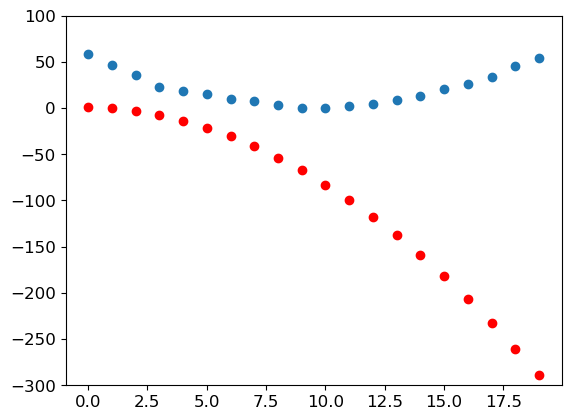

In [36]:
show_preds(preds)

In [37]:
params = orig_params.clone().detach().requires_grad_()

In [38]:
lr = 1e-5
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad.zero_()
    if prn: print(loss)
    return preds

In [39]:
for i in range(10): apply_step(params)

tensor(24166.2148, grad_fn=<MeanBackward0>)
tensor(4910.1572, grad_fn=<MeanBackward0>)
tensor(1266.3197, grad_fn=<MeanBackward0>)
tensor(576.7921, grad_fn=<MeanBackward0>)
tensor(446.3101, grad_fn=<MeanBackward0>)
tensor(421.6165, grad_fn=<MeanBackward0>)
tensor(416.9413, grad_fn=<MeanBackward0>)
tensor(416.0541, grad_fn=<MeanBackward0>)
tensor(415.8839, grad_fn=<MeanBackward0>)
tensor(415.8493, grad_fn=<MeanBackward0>)


In [40]:
params = orig_params.clone().detach().requires_grad_()

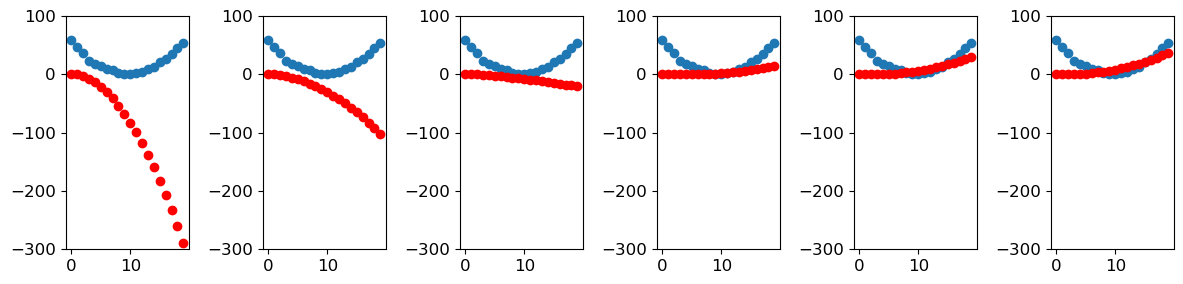

In [41]:
_,axs = fva.plt.subplots(1,6,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
fva.plt.tight_layout()

In [42]:
fva.torch.cat([stacked_threes, stacked_sevens]).shape

torch.Size([12396, 28, 28])

In [43]:
train_x = fva.torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [44]:
train_y = fva.tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [45]:
fva.tensor([1]*len(threes) + [0]*len(sevens)).shape

torch.Size([12396])

In [46]:
train_y, fva.tensor([1]*len(threes) + [0]*len(sevens))

(tensor([[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]]),
 tensor([1, 1, 1,  ..., 0, 0, 0]))

In [47]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [48]:
valid_x = fva.torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = fva.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [49]:
def init_params(size, std=1.0): 
    return (fva.torch.randn(size)*std).requires_grad_()

In [50]:
weights = init_params((28*28,1))

In [51]:
bias = init_params(1)

In [52]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

<Axes: >

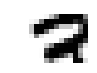

In [53]:
fva.show_image(train_x[2].view(28,28)[4:15,4:20])

In [54]:
def linear1(xb, w, b): return xb@w + b
preds = linear1(train_x, weights, bias)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

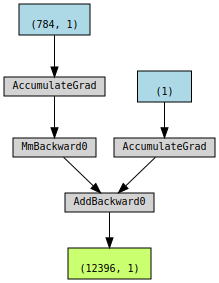

In [55]:
from torchviz import make_dot
make_dot(preds, params={"x": x})

In [56]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [57]:
corrects.float().mean().item()

0.4912068545818329

In [58]:
with fva.torch.no_grad(): weights[0] *= 1.005

In [59]:
preds=linear1(train_x, weights, bias)
((preds > 0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [60]:
def mnist_loss(prds, trgts):
    prds = prds.sigmoid()
    return fva.torch.where(trgts == 1, 1 - prds, prds).mean()

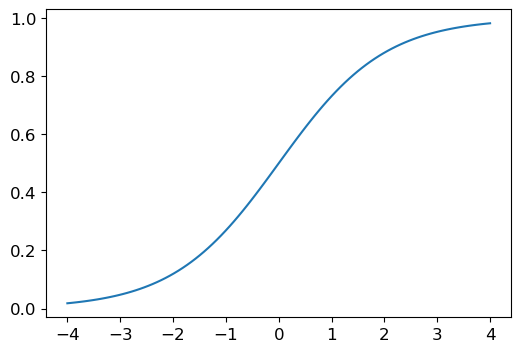

In [61]:
def sigmoidf(x): return 1/(1+fva.torch.exp(-x))
fb.plot_function(sigmoidf, min = -4, max = 4)

In [62]:
weights = init_params((28*28,1))
bias = init_params(1)

In [63]:
dl = fva.DataLoader(dset, batch_size=256)
xb, yb = fva.first(dl)
xb.shape, yb.shape 

(torch.Size([256, 784]), torch.Size([256, 1]))

In [64]:
valid_dl = fva.DataLoader(valid_dset, batch_size=256)

In [65]:
def calc_grad(xb, yb, model, w, b):
    preds = model(xb, w, b)
    loss = mnist_loss(preds, yb)
    loss.backward()
    return [preds, loss]

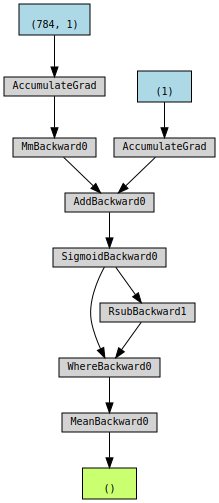

In [66]:
test_weights = init_params((28*28,1))
test_bias = init_params(1)
xb, yb = fva.first(dl)
ps, ls = calc_grad(xb, yb, linear1, test_weights, test_bias)
from torchviz import make_dot
make_dot(ls, params={"ls": x})

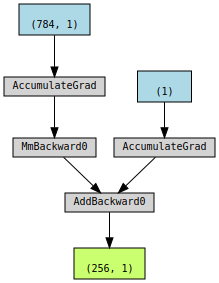

In [67]:
from torchviz import make_dot
make_dot(ps, params={"ps": x})

In [68]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model, weights, bias)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [69]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [70]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb, weights, bias), yb) for xb, yb in valid_dl]
    return round(fva.torch.stack(accs).mean().item(), 4)

In [71]:
lr1 = 0.01
params = weights, bias
for i in range(200):
    train_epoch(linear1, lr1, params)
    print(validate_epoch(linear1), end=' ')

0.4831 0.4846 0.4911 0.4931 0.4985 0.503 0.5054 0.5069 0.5079 0.5109 0.5128 0.5133 0.5148 0.5158 0.5168 0.5177 0.5188 0.5198 0.5207 0.5217 0.5217 0.5217 0.5246 0.5256 0.5276 0.5281 0.5295 0.53 0.531 0.5325 0.5344 0.5364 0.5379 0.5388 0.5403 0.5408 0.5413 0.5437 0.5472 0.552 0.5545 0.555 0.5579 0.5589 0.5613 0.5647 0.5667 0.5682 0.5696 0.5735 0.5769 0.5813 0.5882 0.5901 0.596 0.6013 0.6092 0.612 0.6155 0.6213 0.6291 0.634 0.6403 0.6443 0.6516 0.6623 0.6692 0.6789 0.6862 0.6975 0.7058 0.7106 0.7199 0.7302 0.738 0.7462 0.7531 0.757 0.7682 0.7741 0.7824 0.7887 0.7955 0.8009 0.8058 0.8121 0.818 0.8234 0.8273 0.8312 0.8385 0.8419 0.8449 0.8493 0.8542 0.8576 0.8596 0.861 0.8649 0.8688 0.8727 0.8742 0.8757 0.8781 0.8796 0.8815 0.8835 0.884 0.8854 0.8874 0.8899 0.8913 0.8928 0.8933 0.8943 0.8952 0.8962 0.8977 0.8992 0.9006 0.9021 0.9026 0.9026 0.9045 0.905 0.9055 0.906 0.907 0.9079 0.9104 0.9109 0.9109 0.9109 0.9114 0.9109 0.9114 0.9133 0.9148 0.9143 0.9168 0.9178 0.9182 0.9192 0.9187 0.9192 0.

In [72]:
dls = fva.DataLoaders(dl, valid_dl)

In [73]:
simple_net = fva.nn.Sequential(
    fva.nn.Linear(28*28, 30),
    fva.nn.ReLU(),
    fva.nn.Linear(30, 1)
)

In [74]:
learn = fva.Learner(dls, simple_net, opt_func=fva.SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [75]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.308586,0.419751,0.504416,00:00
1,0.148193,0.227570,0.805692,00:00
2,0.082313,0.114715,0.917076,00:00
3,0.054193,0.077688,0.939647,00:00
4,0.041118,0.060835,0.956330,00:00
5,0.034415,0.051357,0.964181,00:00
6,0.030549,0.045356,0.966143,00:00
7,0.028026,0.041242,0.966634,00:00
8,0.026203,0.038244,0.968597,00:00
9,0.024788,0.035955,0.971050,00:00


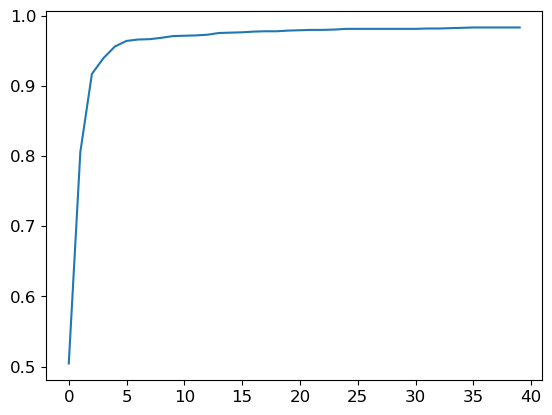

In [76]:
fva.plt.plot(fva.L(learn.recorder.values).itemgot(2))